<a href="https://colab.research.google.com/github/prat-man/CSE-575-Statistical-Machine-Learning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

In [2]:
seed = 0

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/prat-man/CSE-575-Statistical-Machine-Learning/main/data/features_30_sec.csv')

In [4]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [5]:
df.drop(['filename', 'length'], axis=1, inplace=True)

In [6]:
X = df.loc[:, df.columns != 'label']
y = df.loc[:, df.columns == 'label']

In [7]:
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)
labels = encoder.categories_[0]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, stratify=y, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=0.5, stratify=y_test, random_state=seed)

In [9]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [10]:
model_layers = [
    Input(X_train.shape[1]),

    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),

    Dense(10, activation='softmax')
]

model = Sequential(model_layers)

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3712      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 12,682
Trainable params: 12,682
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64)

Epoch 1/50
10/10 [==============================] - 2s 53ms/step - loss: 2.2281 - accuracy: 0.2317 - val_loss: 2.0537 - val_accuracy: 0.3350
Epoch 2/50
10/10 [==============================] - 0s 10ms/step - loss: 1.9506 - accuracy: 0.3433 - val_loss: 1.8327 - val_accuracy: 0.3750
Epoch 3/50
10/10 [==============================] - 0s 17ms/step - loss: 1.7409 - accuracy: 0.4000 - val_loss: 1.6365 - val_accuracy: 0.4150
Epoch 4/50
10/10 [==============================] - 0s 20ms/step - loss: 1.5484 - accuracy: 0.4783 - val_loss: 1.4742 - val_accuracy: 0.4650
Epoch 5/50
10/10 [==============================] - 0s 19ms/step - loss: 1.3927 - accuracy: 0.5300 - val_loss: 1.3465 - val_accuracy: 0.5250
Epoch 6/50
10/10 [==============================] - 0s 16ms/step - loss: 1.2517 - accuracy: 0.5900 - val_loss: 1.2623 - val_accuracy: 0.5750
Epoch 7/50
10/10 [==============================] - 0s 10ms/step - loss: 1.1335 - accuracy: 0.6150 - val_loss: 1.1863 - val_accuracy: 0.6350
Epoch 8/50
10

In [14]:
_, accuracy = model.evaluate(X_train, y_train)
print(f'Training Accuracy: {accuracy}')

19/19 [==============================] - 0s 6ms/step - loss: 0.0526 - accuracy: 0.9967
Training Accuracy: 0.996666669845581


In [15]:
y_pred = model.predict(X_test)

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

7/7 [==============================] - 0s 6ms/step


In [16]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.65      0.72        20
           1       0.95      0.90      0.92        20
           2       0.71      0.85      0.77        20
           3       0.56      0.70      0.62        20
           4       0.59      0.65      0.62        20
           5       0.90      0.90      0.90        20
           6       0.89      0.85      0.87        20
           7       0.75      0.60      0.67        20
           8       0.61      0.55      0.58        20
           9       0.62      0.65      0.63        20

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200



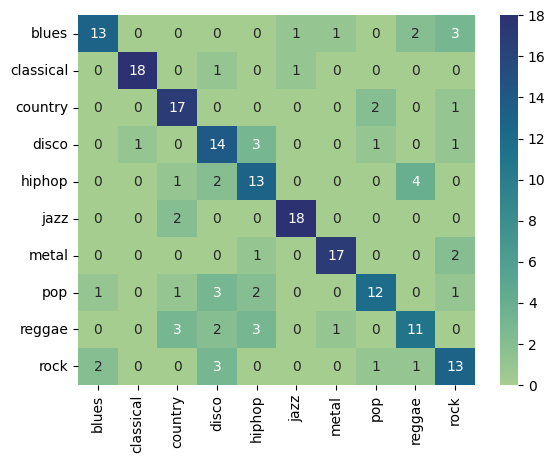

In [17]:
conf_m = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_m, cmap='crest', annot=True)

plt.xticks(ticks = np.arange(0.5, 10, 1), labels=labels, rotation=90)
plt.yticks(ticks = np.arange(0.5, 10, 1), labels=labels,rotation=0)

plt.savefig('ANN_Confusion_Matrix.png', dpi=300)

In [18]:
accuracy = np.trace(conf_m) / np.sum(conf_m)
print(f'Overall test accuracy = {accuracy}')

Overall test accuracy = 0.73


In [19]:
accuracy_df = pd.DataFrame(columns=['accuracy'])

class_acc = conf_m.diagonal() / conf_m.sum(axis=1)
for i in range(len(labels)):
    accuracy_df.loc[labels[i]] = [round(class_acc[i], 2)]

accuracy_df

,accuracy
blues,0.65
classical,0.90
country,0.85
disco,0.70
hiphop,0.65
jazz,0.90
metal,0.85
pop,0.60
reggae,0.55
rock,0.65


In [20]:
model.save('ANN.h5')